In [70]:
import os
import numpy as np 
import tensorflow as tf
import skimage.io
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.preprocessing.image import img_to_array, load_img

In [71]:
airport_folder = r'C:\Users\SESA737860\Desktop\lime and shap\IMAGES\Airport'
bathroom_folder = r'C:\Users\SESA737860\Desktop\lime and shap\IMAGES\Bathroom'


In [72]:
def load_and_preprocess_image(image_path):
    Xi = skimage.io.imread(image_path)
    Xi = skimage.transform.resize(Xi, (299,299))
    Xi = (Xi - 0.5)*2
    return Xi


In [73]:

airport_images = [os.path.join(airport_folder, img) for img in os.listdir(airport_folder)]
bathroom_images = [os.path.join(bathroom_folder, img) for img in os.listdir(bathroom_folder)]


In [74]:
airport_images

['C:\\Users\\SESA737860\\Desktop\\lime and shap\\IMAGES\\Airport\\Airport_Terminal_ADE_train_00000001.jpg',
 'C:\\Users\\SESA737860\\Desktop\\lime and shap\\IMAGES\\Airport\\Airport_Terminal_ADE_train_00000002.jpg',
 'C:\\Users\\SESA737860\\Desktop\\lime and shap\\IMAGES\\Airport\\Airport_Terminal_ADE_train_00001092.jpg',
 'C:\\Users\\SESA737860\\Desktop\\lime and shap\\IMAGES\\Airport\\Airport_Terminal_ADE_train_00001093.jpg']

In [75]:

images = airport_images + bathroom_images
labels = [0] * len(airport_images) + [1] * len(bathroom_images)  # 0 for airport, 1 for bathroom


In [76]:
labels

[0, 0, 0, 0, 1, 1, 1, 1, 1]

In [77]:

train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)

train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)


In [78]:
train_labels

[0, 1, 1, 0, 1]

In [79]:

train_images = np.array([load_and_preprocess_image(img) for img in train_images])
val_images = np.array([load_and_preprocess_image(img) for img in val_images])
test_images = np.array([load_and_preprocess_image(img) for img in test_images])


In [80]:
type(train_labels[0])

int

In [81]:

base_model = InceptionV3(weights='imagenet', include_top=False)


In [82]:

x = base_model.output
x = GlobalAveragePooling2D()(x)

x = Dense(1024, activation='relu')(x)


In [83]:

predictions = Dense(1, activation='sigmoid')(x)


In [84]:

model = Model(inputs=base_model.input, outputs=predictions)


In [85]:

for layer in base_model.layers:
    layer.trainable = False


In [86]:

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [87]:
train_labels = np.array(train_labels)
val_labels = np.array(val_labels)
test_labels = np.array(test_labels)

In [88]:

model.fit(train_images, train_labels, epochs=10, batch_size=5, validation_data=(val_images, val_labels))


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - accuracy: 0.4000 - loss: 0.9236 - val_accuracy: 0.5000 - val_loss: 3.2030
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step - accuracy: 0.6000 - loss: 0.9983 - val_accuracy: 1.0000 - val_loss: 0.2327
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step - accuracy: 1.0000 - loss: 0.0038 - val_accuracy: 1.0000 - val_loss: 0.0200
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step - accuracy: 1.0000 - loss: 0.0038 - val_accuracy: 1.0000 - val_loss: 0.1563
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step - accuracy: 1.0000 - loss: 0.0127 - val_accuracy: 0.5000 - val_loss: 0.5244
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step - accuracy: 1.0000 - loss: 0.0287 - val_accuracy: 0.5000 - val_loss: 0.8171
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step - accuracy: 1.0000 - loss: 0.0351 - val_accuracy: 0.5000 - val_loss: 0.8352
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step - accuracy: 1.0000 - loss: 0.0237 - val_accuracy: 0.5000 - val_loss: 0.

In [89]:

loss, accuracy = model.evaluate(test_images, test_labels)
print(f'Test Accuracy: {accuracy}')

model.save('image_classifier_inceptionv3_model.keras')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step - accuracy: 1.0000 - loss: 0.0065
Test Accuracy: 1.0


In [96]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

new_image_path = r'C:\Users\SESA737860\Downloads\Airport_Terminal_ADE_train_00001094.jpg'  
new_image = load_img(new_image_path, target_size=(299, 299))
new_image_array = img_to_array(new_image)
new_image_array = np.expand_dims(new_image_array, axis=0)  
new_image_array = tf.keras.applications.inception_v3.preprocess_input(new_image_array) 

predictions = model.predict(new_image_array)

if predictions[0][0] > 0.5:
    print("Predicted class: Bathroom")
else:
    print("Predicted class: Airport Terminal")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
Predicted class: Airport Terminal


In [97]:
predictions[0][0]

1.5597193e-06

In [92]:
new_image_array[0].shape

(299, 299, 3)

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step


  1%|          | 10/1000 [00:00<00:44, 22.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step


  2%|▏         | 20/1000 [00:01<00:52, 18.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step


  3%|▎         | 30/1000 [00:01<00:51, 18.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step


  4%|▍         | 40/1000 [00:02<00:51, 18.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step


  5%|▌         | 50/1000 [00:02<00:47, 19.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step


  6%|▌         | 60/1000 [00:03<00:46, 20.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step


  7%|▋         | 70/1000 [00:03<00:47, 19.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step


  8%|▊         | 80/1000 [00:04<00:49, 18.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


  9%|▉         | 90/1000 [00:04<00:48, 18.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step


 10%|█         | 100/1000 [00:05<00:47, 18.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step


 11%|█         | 110/1000 [00:05<00:45, 19.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step


 12%|█▏        | 120/1000 [00:06<00:45, 19.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step


 13%|█▎        | 130/1000 [00:06<00:45, 19.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


 14%|█▍        | 140/1000 [00:07<00:45, 19.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step


 15%|█▌        | 150/1000 [00:07<00:43, 19.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step


 16%|█▌        | 160/1000 [00:08<00:43, 19.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


 17%|█▋        | 170/1000 [00:08<00:41, 19.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step


 18%|█▊        | 180/1000 [00:09<00:41, 19.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step


 19%|█▉        | 190/1000 [00:09<00:41, 19.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


 20%|██        | 200/1000 [00:10<00:41, 19.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step


 21%|██        | 210/1000 [00:10<00:40, 19.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


 22%|██▏       | 220/1000 [00:11<00:39, 19.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step


 23%|██▎       | 230/1000 [00:11<00:37, 20.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


 24%|██▍       | 240/1000 [00:12<00:38, 19.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


 25%|██▌       | 250/1000 [00:12<00:39, 19.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step


 26%|██▌       | 260/1000 [00:13<00:38, 19.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


 27%|██▋       | 270/1000 [00:13<00:36, 19.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


 28%|██▊       | 280/1000 [00:14<00:35, 20.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step


 29%|██▉       | 290/1000 [00:14<00:35, 20.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


 30%|███       | 300/1000 [00:15<00:36, 19.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step


 31%|███       | 310/1000 [00:16<00:37, 18.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step


 32%|███▏      | 320/1000 [00:16<00:35, 19.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


 33%|███▎      | 330/1000 [00:16<00:34, 19.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step


 34%|███▍      | 340/1000 [00:17<00:32, 20.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


 35%|███▌      | 350/1000 [00:17<00:31, 20.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step


 36%|███▌      | 360/1000 [00:18<00:32, 19.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


 37%|███▋      | 370/1000 [00:18<00:32, 19.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step


 38%|███▊      | 380/1000 [00:19<00:30, 20.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


 39%|███▉      | 390/1000 [00:19<00:29, 20.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step


 40%|████      | 400/1000 [00:20<00:28, 21.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


 41%|████      | 410/1000 [00:20<00:28, 21.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step


 42%|████▏     | 420/1000 [00:21<00:29, 19.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 429ms/step


 43%|████▎     | 430/1000 [00:21<00:29, 19.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step


 44%|████▍     | 440/1000 [00:22<00:28, 19.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step


 45%|████▌     | 450/1000 [00:22<00:26, 20.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step


 46%|████▌     | 460/1000 [00:23<00:25, 21.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


 47%|████▋     | 470/1000 [00:23<00:25, 21.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step


 48%|████▊     | 480/1000 [00:24<00:25, 20.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step


 49%|████▉     | 490/1000 [00:24<00:25, 19.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step


 50%|█████     | 500/1000 [00:25<00:25, 19.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step


 51%|█████     | 510/1000 [00:25<00:23, 20.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step


 52%|█████▏    | 520/1000 [00:26<00:22, 21.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


 53%|█████▎    | 530/1000 [00:26<00:21, 21.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step


 54%|█████▍    | 540/1000 [00:27<00:22, 20.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step


 55%|█████▌    | 550/1000 [00:27<00:22, 19.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step


 56%|█████▌    | 560/1000 [00:28<00:21, 20.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step


 57%|█████▋    | 570/1000 [00:28<00:20, 20.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step


 58%|█████▊    | 580/1000 [00:29<00:19, 21.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step


 59%|█████▉    | 590/1000 [00:29<00:19, 20.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step


 60%|██████    | 600/1000 [00:30<00:20, 19.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


 61%|██████    | 610/1000 [00:30<00:20, 19.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step


 62%|██████▏   | 620/1000 [00:31<00:18, 20.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step


 63%|██████▎   | 630/1000 [00:31<00:17, 20.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step


 64%|██████▍   | 640/1000 [00:32<00:17, 21.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step


 65%|██████▌   | 650/1000 [00:32<00:16, 21.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step


 66%|██████▌   | 660/1000 [00:33<00:17, 19.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


 67%|██████▋   | 670/1000 [00:33<00:16, 19.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step


 68%|██████▊   | 680/1000 [00:34<00:15, 20.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step


 69%|██████▉   | 690/1000 [00:34<00:14, 20.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step


 70%|███████   | 700/1000 [00:35<00:14, 21.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step


 71%|███████   | 710/1000 [00:35<00:13, 21.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


 72%|███████▏  | 720/1000 [00:36<00:13, 20.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step


 73%|███████▎  | 730/1000 [00:36<00:13, 20.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step


 74%|███████▍  | 740/1000 [00:37<00:12, 20.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step


 75%|███████▌  | 750/1000 [00:37<00:11, 21.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step


 76%|███████▌  | 760/1000 [00:37<00:10, 21.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step


 77%|███████▋  | 770/1000 [00:38<00:10, 21.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step


 78%|███████▊  | 780/1000 [00:38<00:10, 20.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step


 79%|███████▉  | 790/1000 [00:39<00:10, 19.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


 80%|████████  | 800/1000 [00:39<00:10, 19.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


 81%|████████  | 810/1000 [00:40<00:09, 19.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step


 82%|████████▏ | 820/1000 [00:40<00:08, 20.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step


 83%|████████▎ | 830/1000 [00:41<00:08, 19.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step


 84%|████████▍ | 840/1000 [00:42<00:08, 18.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


 85%|████████▌ | 850/1000 [00:42<00:07, 18.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step


 86%|████████▌ | 860/1000 [00:43<00:07, 18.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step


 87%|████████▋ | 870/1000 [00:43<00:06, 19.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


 88%|████████▊ | 880/1000 [00:44<00:06, 19.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


 89%|████████▉ | 890/1000 [00:44<00:05, 19.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step


 90%|█████████ | 900/1000 [00:45<00:05, 19.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step


 91%|█████████ | 910/1000 [00:45<00:04, 18.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step


 92%|█████████▏| 920/1000 [00:46<00:04, 18.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


 93%|█████████▎| 930/1000 [00:46<00:03, 19.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step


 94%|█████████▍| 940/1000 [00:47<00:03, 19.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step


 95%|█████████▌| 950/1000 [00:47<00:02, 19.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step


 96%|█████████▌| 960/1000 [00:48<00:02, 18.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step


 97%|█████████▋| 970/1000 [00:48<00:01, 18.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step


 98%|█████████▊| 980/1000 [00:49<00:01, 18.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step


 99%|█████████▉| 990/1000 [00:50<00:00, 17.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 658ms/step


100%|██████████| 1000/1000 [00:50<00:00, 19.65it/s]


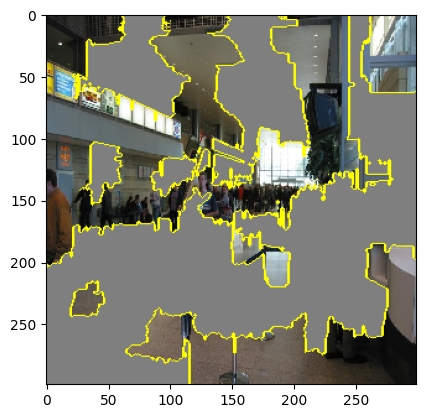

In [95]:
import skimage.io
from lime import lime_image
import matplotlib.pyplot as plt
from skimage.segmentation import mark_boundaries


explainer = lime_image.LimeImageExplainer()
explanation = explainer.explain_instance(new_image_array[0], model.predict, top_labels=1, hide_color=0, num_samples=1000)

temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=30, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
plt.show()